In [1]:
# Import all the modules needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
# load the data while parsing the date column
df =pd.read_csv("train(1).csv")
test = pd.read_csv("test(1).csv")
df.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Yes
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,No
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Yes
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,No
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,No


In [3]:
# comprehensive check of how the data look
df.describe(include="all")


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
count,16466,16466.00000,16466,16466,16466,16466.000000,16466.000000,16466,16466,16466,16466,16466,16466
unique,3,NaN,8735,2,2,NaN,NaN,2,6,5,6,10,2
top,Rwanda,NaN,uniqueid_1,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,No
freq,8735,NaN,3,11491,13040,NaN,NaN,9663,9023,8888,8494,5441,13795
mean,NaN,2016.83803,NaN,NaN,NaN,4.089214,39.321936,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.93425,NaN,NaN,NaN,2.154550,16.669577,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.00000,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.00000,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2016.00000,NaN,NaN,NaN,4.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.00000,NaN,NaN,NaN,5.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# check for null values
df.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
bank_account              0
dtype: int64

In [5]:
# Print all unique values for all the colums
for d in df.columns:
    print(df[f"{d}"].value_counts())

Rwanda      8735
Kenya       6068
Tanzania    1663
Name: country, dtype: int64
2016    8735
2018    6068
2017    1663
Name: year, dtype: int64
uniqueid_1       3
uniqueid_833     3
uniqueid_1117    3
uniqueid_1116    3
uniqueid_1115    3
                ..
uniqueid_6958    1
uniqueid_6959    1
uniqueid_6960    1
uniqueid_6961    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64
Rural    11491
Urban     4975
Name: location_type, dtype: int64
Yes    13040
No      3426
Name: cellphone_access, dtype: int64
4     2801
3     2794
2     2580
5     2419
1     1800
6     1790
7     1183
8      607
9      283
10     121
11      44
12      23
13      11
15       4
14       3
16       2
21       1
Name: household_size, dtype: int64
30     719
35     602
25     517
28     515
32     490
      ... 
98       2
96       2
99       2
97       1
100      1
Name: age_of_respondent, Length: 85, dtype: int64
Female    9663
Male      6803
Name: gender_of_respondent, dtype: int64
Head of Househ

In [6]:
# We perfom a little tweak here, for all columns with less than 4 values, that is 3 or 2 unique values, we assign the unique values 0, 1,2
# For this we go column by column
# First check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 16466 non-null  object
 1   year                    16466 non-null  int64 
 2   uniqueid                16466 non-null  object
 3   location_type           16466 non-null  object
 4   cellphone_access        16466 non-null  object
 5   household_size          16466 non-null  int64 
 6   age_of_respondent       16466 non-null  int64 
 7   gender_of_respondent    16466 non-null  object
 8   relationship_with_head  16466 non-null  object
 9   marital_status          16466 non-null  object
 10  education_level         16466 non-null  object
 11  job_type                16466 non-null  object
 12  bank_account            16466 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.6+ MB


In [7]:
df["country"].value_counts()

Rwanda      8735
Kenya       6068
Tanzania    1663
Name: country, dtype: int64

In [8]:
# country

# Rwanda - 0
# Kenya -1
# data cleaning 
from sklearn.preprocessing import LabelEncoder
def clean_data(data):
    data = data.drop("country", axis=1)
    data = data.drop("uniqueid", axis =1)
    convert_columns=["relationship_with_head","marital_status","education_level","job_type"]# List of columns to encode
# import as we go
    

    label_encoder = LabelEncoder()

    for column in convert_columns:
        data[column] = label_encoder.fit_transform(df[column])
    
    data['location_type'] = data['location_type'].replace({'Rural': 0, 'Urban': 1}).astype(int)
    data['cellphone_access'] = data['cellphone_access'].replace({'No': 0, 'Yes':1})
    data['gender_of_respondent'] = data['gender_of_respondent'].replace({'Male': 0, 'Female':1})
    data['bank_account'] = data['bank_account'].replace({'No': 0, 'Yes':1})
    
    return data



In [9]:
df["year"].dtype # Year column is sorted

dtype('int64')

In [10]:
df.T #transpose the data to see columns by side

,0,1,2,3,4,5,6,7,8,9,...,16456,16457,16458,16459,16460,16461,16462,16463,16464,16465
country,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,...,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania
year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5,uniqueid_6,uniqueid_7,uniqueid_8,uniqueid_9,uniqueid_10,...,uniqueid_1654,uniqueid_1655,uniqueid_1656,uniqueid_1657,uniqueid_1658,uniqueid_1659,uniqueid_1660,uniqueid_1661,uniqueid_1662,uniqueid_1663
location_type,Rural,Rural,Urban,Rural,Urban,Rural,Rural,Rural,Rural,Urban,...,Urban,Urban,Urban,Urban,Urban,Urban,Rural,Urban,Rural,Urban
cellphone_access,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,...,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes
household_size,3,5,5,5,8,7,7,1,3,3,...,7,4,2,1,5,2,2,2,2,1
age_of_respondent,24,70,26,34,26,26,32,42,54,76,...,19,27,35,62,27,20,52,30,47,68
gender_of_respondent,Female,Female,Male,Female,Male,Female,Female,Female,Male,Female,...,Male,Female,Female,Female,Male,Female,Female,Female,Male,Female
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child,Spouse,Spouse,Head of Household,Head of Household,Head of Household,...,Child,Parent,Spouse,Head of Household,Parent,Spouse,Spouse,Spouse,Head of Household,Head of Household
marital_status,Married/Living together,Widowed,Single/Never Married,Married/Living together,Single/Never Married,Married/Living together,Married/Living together,Married/Living together,Married/Living together,Divorced/Seperated,...,Divorced/Seperated,Single/Never Married,Single/Never Married,Widowed,Divorced/Seperated,Single/Never Married,Single/Never Married,Single/Never Married,Single/Never Married,Married/Living together


In [11]:
# clean the df
df = clean_data(df)

In [12]:

df

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,2018,0,1,3,24,1,5,2,3,9,1
1,2018,0,0,5,70,1,1,4,0,4,0
2,2018,1,1,5,26,0,3,3,5,9,1
3,2018,0,1,5,34,1,1,2,2,3,0
4,2018,1,0,8,26,0,0,3,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...
16461,2017,1,0,2,20,1,5,3,2,9,0
16462,2017,0,1,2,52,1,5,3,2,9,0
16463,2017,1,0,2,30,1,5,3,0,9,0
16464,2017,0,1,2,47,0,1,3,2,5,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   year                    16466 non-null  int64
 1   location_type           16466 non-null  int32
 2   cellphone_access        16466 non-null  int64
 3   household_size          16466 non-null  int64
 4   age_of_respondent       16466 non-null  int64
 5   gender_of_respondent    16466 non-null  int64
 6   relationship_with_head  16466 non-null  int32
 7   marital_status          16466 non-null  int32
 8   education_level         16466 non-null  int32
 9   job_type                16466 non-null  int32
 10  bank_account            16466 non-null  int64
dtypes: int32(5), int64(6)
memory usage: 1.1 MB


In [14]:
df.isna().sum()

year                      0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
bank_account              0
dtype: int64

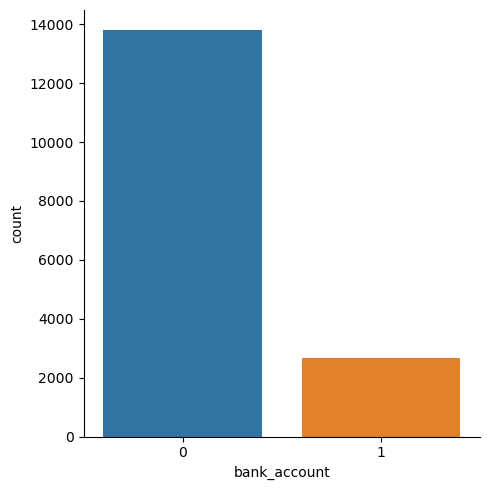

In [15]:
# Explore Target distribution 
import seaborn as sns
sns.catplot(x="bank_account", kind="count", data=df)

In [16]:
# split the data into test and valid
from sklearn.model_selection import train_test_split


x = df.drop('bank_account', axis=1)  # Features
y = df['bank_account']  # Target variable

# Splitting the data into training (80%) and validation (20%) sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)
#import classifier algorithm here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# create models
model = RandomForestClassifier(n_estimators=1000)

#fitting the models
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [17]:
# 

In [18]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
y_model = model.predict(x_valid)

# Get error rate
print("Error rate of randomforest classifier: ", 1 - accuracy_score(y_valid, y_model))

Error rate of randomforest classifier:  0.14329083181542202


In [19]:
# !pip install xgboost

## Perform Hyperparameter Tuning

In [20]:
# Define parameters in a dictionary
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': randint(5, 50),         # Maximum depth of the tree
    'min_samples_split': randint(2, 20), # Minimum samples required to split a node
}

# Set up the random search with cross-validation
random_search = RandomizedSearchCV(
    model,param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

# Fit the random search to the training data
random_search.fit(x_train, y_train)
random_search.score(x_valid, y_valid)

0.8718882817243473

In [21]:
model.score(x_valid, y_valid) # Initial model accuracy has an error of 0.143..but our second methd has an error of 
# only 0.129..

0.856709168184578

In [22]:
# import the test data as data
data = pd.read_csv("test(1).csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 7058 non-null   object
 1   year                    7058 non-null   int64 
 2   uniqueid                7058 non-null   object
 3   location_type           7058 non-null   object
 4   cellphone_access        7058 non-null   object
 5   household_size          7058 non-null   int64 
 6   age_of_respondent       7058 non-null   int64 
 7   gender_of_respondent    7058 non-null   object
 8   relationship_with_head  7058 non-null   object
 9   marital_status          7058 non-null   object
 10  education_level         7058 non-null   object
 11  job_type                7058 non-null   object
dtypes: int64(3), object(9)
memory usage: 661.8+ KB


In [23]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7048,7049,7050,7051,7052,7053,7054,7055,7056,7057
country,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,...,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda
year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
uniqueid,uniqueid_1664,uniqueid_1665,uniqueid_1666,uniqueid_1667,uniqueid_1668,uniqueid_1669,uniqueid_1670,uniqueid_1671,uniqueid_1672,uniqueid_1673,...,uniqueid_2107,uniqueid_2108,uniqueid_2109,uniqueid_2110,uniqueid_2111,uniqueid_2113,uniqueid_2114,uniqueid_2115,uniqueid_2116,uniqueid_2117
location_type,Urban,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Urban,Urban,...,Urban,Rural,Urban,Urban,Rural,Rural,Rural,Rural,Urban,Rural
cellphone_access,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
household_size,8,12,2,2,3,1,2,2,2,1,...,6,6,3,9,9,4,2,5,7,10
age_of_respondent,27,17,20,35,20,28,49,30,80,30,...,24,16,35,16,20,48,27,27,30,20
gender_of_respondent,Female,Male,Female,Male,Female,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Female,Female,Female,Female,Female,Male
relationship_with_head,Spouse,Parent,Spouse,Head of Household,Parent,Head of Household,Head of Household,Head of Household,Other relative,Head of Household,...,Spouse,Parent,Head of Household,Parent,Child,Head of Household,Head of Household,Parent,Parent,Child
marital_status,Single/Never Married,Divorced/Seperated,Single/Never Married,Single/Never Married,Divorced/Seperated,Single/Never Married,Single/Never Married,Single/Never Married,Married/Living together,Married/Living together,...,Married/Living together,Single/Never Married,Married/Living together,Single/Never Married,Single/Never Married,Divorced/Seperated,Single/Never Married,Widowed,Divorced/Seperated,Single/Never Married


In [24]:
data.country.value_counts()

Tanzania    4957
Uganda      2101
Name: country, dtype: int64

In [25]:
data['country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7058 entries, 0 to 7057
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
7058 non-null   object
dtypes: object(1)
memory usage: 55.3+ KB


In [26]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7048,7049,7050,7051,7052,7053,7054,7055,7056,7057
country,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,Tanzania,...,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda
year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
uniqueid,uniqueid_1664,uniqueid_1665,uniqueid_1666,uniqueid_1667,uniqueid_1668,uniqueid_1669,uniqueid_1670,uniqueid_1671,uniqueid_1672,uniqueid_1673,...,uniqueid_2107,uniqueid_2108,uniqueid_2109,uniqueid_2110,uniqueid_2111,uniqueid_2113,uniqueid_2114,uniqueid_2115,uniqueid_2116,uniqueid_2117
location_type,Urban,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Urban,Urban,...,Urban,Rural,Urban,Urban,Rural,Rural,Rural,Rural,Urban,Rural
cellphone_access,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
household_size,8,12,2,2,3,1,2,2,2,1,...,6,6,3,9,9,4,2,5,7,10
age_of_respondent,27,17,20,35,20,28,49,30,80,30,...,24,16,35,16,20,48,27,27,30,20
gender_of_respondent,Female,Male,Female,Male,Female,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Female,Female,Female,Female,Female,Male
relationship_with_head,Spouse,Parent,Spouse,Head of Household,Parent,Head of Household,Head of Household,Head of Household,Other relative,Head of Household,...,Spouse,Parent,Head of Household,Parent,Child,Head of Household,Head of Household,Parent,Parent,Child
marital_status,Single/Never Married,Divorced/Seperated,Single/Never Married,Single/Never Married,Divorced/Seperated,Single/Never Married,Single/Never Married,Single/Never Married,Married/Living together,Married/Living together,...,Married/Living together,Single/Never Married,Married/Living together,Single/Never Married,Single/Never Married,Divorced/Seperated,Single/Never Married,Widowed,Divorced/Seperated,Single/Never Married


In [27]:
# clean the test data in the same way as the train data
from sklearn.preprocessing import LabelEncoder

data = data.drop("country", axis=1)
data = data.drop("uniqueid", axis =1)
convert_columns=["relationship_with_head","marital_status","education_level","job_type"]# List of columns to encode
# ipmort as we go
    

label_encoder = LabelEncoder()

for column in convert_columns:
    data[column] = label_encoder.fit_transform(data[column])
    
data['location_type'] = data['location_type'].replace({'Rural': 0, 'Urban': 1}).astype(int)
data['cellphone_access'] = data['cellphone_access'].replace({'No': 0, 'Yes':1})
data['gender_of_respondent'] = data['gender_of_respondent'].replace({'Male': 0, 'Female':1})
# data['bank_account'] = data['bank_account'].replace({'No': 0, 'Yes':1})

In [28]:
# Get the predicted result for the test Data
predicted_values = random_search.predict(data)
predicted_values



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# Export the file to csv
# Create submission DataFrame
data_test = pd.read_csv("test(1).csv")
submission = pd.DataFrame({"uniqueid": data_test["uniqueid"] + " x " + data_test["country"],
                           "bank_account": predicted_values})
submission.sample(10)


,uniqueid,bank_account
5249,uniqueid_293 x Uganda,0
1092,uniqueid_2756 x Tanzania,0
6218,uniqueid_1262 x Uganda,0
1648,uniqueid_3312 x Tanzania,0
3943,uniqueid_5607 x Tanzania,0
3627,uniqueid_5291 x Tanzania,0
4024,uniqueid_5688 x Tanzania,0
3510,uniqueid_5174 x Tanzania,0
2041,uniqueid_3705 x Tanzania,0
428,uniqueid_2092 x Tanzania,0


In [30]:
# checking if the error rate has increased from the initial one 0.14

In [31]:
# Label 1 as Yes and 0 as No
# Push the data to a csv file
submission["bank_account"] = submission["bank_account"].replace({0:"No",1:"Yes"})
submission.to_csv("first_submission.csv", index=False)
